In [ ]:
#1
import numpy as np

def hebbian_learning(weight, input, output, learning_rate=0.1):
    return weight + learning_rate * output * input


def perceptron_learning(weight, input, target, learning_rate=0.1):
    output = np.sign(np.dot(weight, input))
    error = target - output
    return weight + learning_rate * error * input


def delta_learning(weight, input, target, learning_rate=0.1):
    prediction = np.dot(weight, input)
    error = target - prediction
    return weight + learning_rate * error * input


def correlation_learning(weight, input, target, learning_rate=0.1):
    prediction = np.dot(weight, input)
    return weight + learning_rate * (target - prediction) * input


def outstar_learning(weight, input, target, learning_rate=0.1):
    return weight + learning_rate * input * (target - np.dot(weight, input))

weight = np.random.randn(5)
input_vector = np.random.randn(5)
output = np.random.rand() * 2 - 1
target = np.random.rand() * 2 - 1


learning_rate = 0.01


updated_weight_hebbian = hebbian_learning(weight, input_vector, output, learning_rate)
updated_weight_perceptron = perceptron_learning(weight, input_vector, target, learning_rate)
updated_weight_delta = delta_learning(weight, input_vector, target, learning_rate)
updated_weight_correlation = correlation_learning(weight, input_vector, target, learning_rate)
outstar_target = np.random.randn(5)  # More complex target pattern for OutStar
updated_weight_outstar = outstar_learning(weight, input_vector, outstar_target, learning_rate)

print("Updated Weight using Hebbian Learning:", updated_weight_hebbian)
print("Updated Weight using Perceptron Learning:", updated_weight_perceptron)
print("Updated Weight using Delta Learning:", updated_weight_delta)
print("Updated Weight using Correlation Learning:", updated_weight_correlation)
print("Updated Weight using OutStar Learning:", updated_weight_outstar)


Updated Weight using Hebbian Learning: [0.14333696 0.96306296 1.11021271 1.09247387 1.64048336]
Updated Weight using Perceptron Learning: [0.14392094 0.96313056 1.11030628 1.09169886 1.64107525]
Updated Weight using Delta Learning: [0.14764307 0.96356142 1.11090267 1.08675916 1.64484785]
Updated Weight using Correlation Learning: [0.14764307 0.96356142 1.11090267 1.08675916 1.64484785]
Updated Weight using OutStar Learning: [0.14950293 0.9645702  1.11031232 1.07663209 1.63932656]


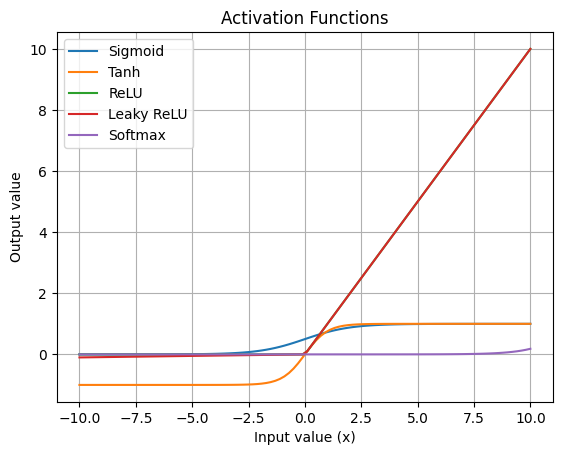

In [ ]:
# 2

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, x * alpha)

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# Plotting function
def plot_activation_functions():
    x = np.linspace(-10, 10, 100)
    activations = {
        "Sigmoid": sigmoid(x),
        "Tanh": tanh(x),
        "ReLU": relu(x),
        "Leaky ReLU": leaky_relu(x),
        "Softmax": softmax(x)
    }

    plt.figure()
    for name, values in activations.items():
        plt.plot(x, values,label=name)

    plt.title("Activation Functions")
    plt.xlabel("Input value (x)")
    plt.ylabel("Output value")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_activation_functions()

In [ ]:
# 3
import numpy as np
def perceptron(inputs, weights, bias):
    return 1 if np.dot(inputs, weights) + bias >=0 else 0

weights = np.array([0.2, 0.4, 0.2])
bias = -0.5
dataset = [([1, 1, 1], 1), ([1, 0, 1], 1), ([0, 1, 1], 0), ([0, 0, 1], 0), ([1, 1, 0], 1),
           ([1, 0, 0], 0), ([0, 1, 0], 0), ([0, 0, 0], 0)]
correct_predictions = 0
total_predictions = len(dataset)
for inputs,actual_output in dataset:
    predicted_output = perceptron(np.array(inputs), weights, bias)
    if predicted_output == actual_output:
        correct_predictions += 1
accuracy = correct_predictions / total_predictions * 100
print(f"Accuracy of the perceptron model: {accuracy:.2f}%")


Accuracy of the perceptron model: 75.00%


In [ ]:
# Experiment 4: Image Processing Operations

# if the install is required do pip install opencv-python

import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure, filters, io
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# Load the image
img = cv2.imread('/content/content.jpg')
plt.axis("off")
plt.title("Original Image")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# Compute and plot the histogram
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.plot(histogram, color='black')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity Values')
plt.grid(True)
plt.show()

# Convert RGB to grayscale
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')
plt.axis("off")
plt.title("Grayscale Image")
plt.show()

# Resize the image
resized_img = cv2.resize(img, (920, 650), interpolation=cv2.INTER_CUBIC)
plt.imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Resized Image")
plt.show()

# Display the blurred image
gaussian_image = cv2.GaussianBlur(resized_img, (15, 15), 0)
plt.imshow(cv2.cvtColor(gaussian_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Blurred Image")
plt.show()

# Edge detection using Canny
edges = cv2.Canny(resized_img, 100, 200)
plt.imshow(edges, cmap='gray')
plt.axis("off")
plt.title("Edge Detection")
plt.show()

# Brightness adjustment
brightness = cv2.addWeighted(resized_img, 1.2, resized_img, 0, 70)
plt.imshow(cv2.cvtColor(brightness, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Brightness Adjustment")
plt.show()

# Sharpen the image
def sharpen_image(image):
    kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
    return cv2.filter2D(image, -1, kernel)

sharpened_image = sharpen_image(resized_img)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Sharpened Image")
plt.show()

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Load an example image to use for augmentation
img = load_img('/content/style.png')
x = img_to_array(img)
x = np.expand_dims(x, axis=0)


num_images = 10
augmented_images = [array_to_img(batch[0]) for i, batch in enumerate(datagen.flow(x, batch_size=1)) if i < num_images]

plt.figure(figsize=(15, 6))
plt.subplot(1, num_images + 1, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

for i in range(num_images):
    plt.subplot(1, num_images + 1, i + 2)
    plt.imshow(augmented_images[i])
    plt.title(f'Augmented Image {i + 1}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Histogram Equalization
input_image = io.imread('/content/content.jpg', as_gray=True)
equalized_image = exposure.equalize_hist(input_image)

# Display original and equalized images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.tight_layout()
plt.show()

# Morphological Operations (Erosion)
kernel = np.ones((5, 5), np.uint8)
eroded_image = cv2.erode(gray_image, kernel, iterations=1)
plt.imshow(eroded_image, cmap='gray')
plt.title('Morphological Operations (Erosion)')
plt.axis('off')
plt.show()

# Thresholding (Simple Binary Thresholding)
thresh_value = filters.threshold_otsu(gray_image)
binary_image = gray_image > thresh_value
plt.imshow(binary_image, cmap='gray')
plt.title('Thresholding')
plt.axis('off')
plt.show()


In [ ]:
# Experiment 5: Style Transfer for an Image

# Importing Required Packages
import tensorflow_hub as hub
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO


def load_img(path):
    img = Image.open(path)
    img = img.convert('RGB')
    img = np.array(img) / 255.0
    return img

try:
    content_image = load_img('/content/style.png')
    style_image = load_img('/content/content.jpg')
except Exception as e:
    print(e)
    raise

model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
def apply_style(content_image, style_image):
    content_image = content_image.astype('float32')[np.newaxis, ...]
    style_image = cv2.resize(style_image, (256, 256)).astype('float32')[np.newaxis, ...]
    stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]
    return stylized_image


stylized_image = apply_style(content_image, style_image)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(stylized_image[0])
plt.title("Stylized Image")
plt.show()


OSError: http://honeywell.lnkiy.in/dlexp5 does not appear to be a valid module.

170498071/170498071 [==============================] - 3s 0us/step


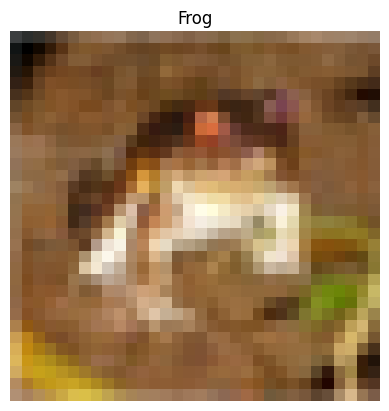

In [ ]:
# Experiment 6: SVM/Softmax Classifier for CIFAR-10 Dataset

# import numpy as np
# import pickle
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

# # Function to load CIFAR-10 dataset from a pickle file
# def load_cifar10_batch(file_path):
#     with open(file_path, 'rb') as file:
#         batch = pickle.load(file, encoding='latin1')
#     data = batch['data']
#     labels = np.array(batch['labels'])
#     return data, labels

# # Load dataset
# data, labels = load_cifar10_batch('path_to_data/cifar-10-batches-py/data_batch_1')

# # Preprocess data
# # Reshape X to 32x32x3 to normalize and visualize, if necessary
# data = data.reshape(data.shape[0], 3, 32, 32).transpose(0, 2, 3, 1)  # to (num_samples, 32, 32, 3)
# data = data.reshape(data.shape[0], -1)  # Flatten to (num_samples, 3072)

# # Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# # Feature scaling
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # SVM Classifier
# svm_clf = SVC(kernel='linear', random_state=42)
# svm_clf.fit(X_train_scaled, y_train)
# y_pred_svm = svm_clf.predict(X_test_scaled)
# print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

# # Softmax Classifier
# softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=1, max_iter=100, random_state=42)
# softmax_clf.fit(X_train_scaled, y_train)
# y_pred_softmax = softmax_clf.predict(X_test_scaled)
# print("Softmax Accuracy:", accuracy_score(y_test, y_pred_softmax))


# ------------------------------------------------------------------------------
# Experiment 6: SVM/Softmax Classifier for CIFAR-10 Dataset

# Importing required libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define CIFAR-10 class names
cifar_10_classes = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

# Display an example image
plt.imshow(x_train[0])
plt.title(cifar_10_classes[y_train[0][0]])
plt.axis("off")
plt.show()

# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert class labels to one-hot encoded vectors
one_hot_encoder = OneHotEncoder()
y_train_encoded = one_hot_encoder.fit_transform(y_train).toarray()
y_test_encoded = one_hot_encoder.transform(y_test).toarray()

# Flatten the images for SVM input
x_train_flatten = x_train.reshape(x_train.shape[0], -1)
x_test_flatten = x_test.reshape(x_test.shape[0], -1)

# Train the SVM classifier
svm_classifier = svm.SVC(kernel='linear', decision_function_shape='ovr')
svm_classifier.fit(x_train_flatten, y_train.ravel())

# Make predictions with the SVM classifier
svm_predictions = svm_classifier.predict(x_test_flatten)

# Calculate the accuracy of the SVM classifier
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Classifier Accuracy: {svm_accuracy * 100:.2f}%")

# Build and compile the Softmax classifier model
softmax_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])
softmax_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Softmax classifier model
softmax_model.fit(x_train, y_train_encoded, epochs=20, batch_size=64, validation_data=(x_test, y_test_encoded))

# Make a prediction using the trained Softmax model
new_image = x_test[10]
plt.imshow(new_image)
plt.axis("off")
plt.show()

img = np.expand_dims(new_image, axis=0)
pred = softmax_model.predict(img)
prediction = np.argmax(pred)
print(f"Predicted Class: {cifar_10_classes[prediction]}")

# Display prediction result
print(f"Softmax Classifier Prediction: {cifar_10_classes[prediction]}")



In [4]:
# Experiment 7: Multi-Layer Neural Networks (MNIST Digit Classification)

# Importing necessary libraries
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset and divide it into training and testing sets
dataset = keras.datasets.mnist
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# # Reshape the data to include the channel dimension
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

x_train /= 255.0
x_test /= 255.0

# Print the shapes of the training and testing data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)

# # Plot a few samples from the training set with their class names
# plt.figure(figsize=(10, 10))
# for i in range(9):
#     plt.subplot(3, 3, i + 1)
#     plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
#     plt.title(class_names[y_train[i]])
#     plt.axis("off")
# plt.show()

# Normalize the pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Define the CNN model
model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1),
    keras.layers.Conv2D(64, (3, 3), activation="relu"),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=1),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam",
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

# Train the model
model.fit(x_train, y_train, epochs=1, callbacks=[keras.callbacks.EarlyStopping(patience=2)])

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# Make a prediction on a sample test image
sample_img = x_test[0]
plt.imshow(sample_img.reshape(28, 28), cmap='gray')
plt.axis("off")
plt.show()

img = np.expand_dims(sample_img, axis=0)
pred = model.predict(img)
print(f"Predicted: {class_names[np.argmax(pred)]}\nActual: {class_names[y_test[0]]}")

# Print the model summary
model.summary()


UFuncTypeError: Cannot cast ufunc 'divide' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'

In [ ]:
# Experiment-8: Dropout Regularization In Deep Neural Network

# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the dataset
df = pd.read_csv("sonar_dataset.csv", header=None)

# Display sample data and shape
print("Sample data:")
print(df.sample(5))
print("Dataset shape:", df.shape)

# Check for missing values
print("Null values in dataset:")
print(df.isna().sum())

X = df.drop(60, axis=1)
y = df[60]

# Encode target labels to numerical values (M -> 1, R -> 0)
y = pd.get_dummies(y, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Define a function to build the model
def build_model(dropout_rate=0.0):
    model = Sequential([
        Dense(60, input_dim=60, activation='relu'),
        Dropout(dropout_rate),
        Dense(30, activation='relu'),
        Dropout(dropout_rate),
        Dense(15, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

print("\nTraining Model without Dropout:")
model = build_model()
history = model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

# Evaluate the model on test data
print("\nEvaluation on Test Data (Model without Dropout):")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy without Dropout: {accuracy:.4f}")

# Make predictions
y_pred = np.round(model.predict(X_test)).reshape(-1)

# Display classification report
print("\nClassification Report (Model without Dropout):")
print(classification_report(y_test, y_pred))

# Build and train the model with dropout
print("\nTraining Model with Dropout:")
model_dropout = build_model(dropout_rate=0.5)
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, batch_size=8, verbose=0)

# Evaluate the model with dropout on test data
print("\nEvaluation on Test Data (Model with Dropout):")
loss_dropout, accuracy_dropout = model_dropout.evaluate(X_test, y_test)
print(f"Test Accuracy with Dropout: {accuracy_dropout:.4f}")

# Make predictions with dropout model
y_pred_dropout = np.round(model_dropout.predict(X_test)).reshape(-1)

# Display classification report with dropout
print("\nClassification Report (Model with Dropout):")
print(classification_report(y_test, y_pred_dropout))

plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy without Dropout', linestyle='--')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy without Dropout')
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy with Dropout', linestyle='--')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy with Dropout')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'sonar_dataset.csv'

In [ ]:
# Experiment-9: Image Segmentation using Mask R-CNN

import os
import sys
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize


ROOT_DIR = "/content/Mask_RCNN"

sys.path.append(ROOT_DIR)

MODEL_DIR = os.path.join(ROOT_DIR, "logs")


IMAGE_PATH = "/content/Mask_RCNN/images/1045023827_4ec3e8ba5c_z.jpg"

# Import COCO config
sys.path.append(os.path.join(ROOT_DIR, "samples/coco/"))
import coco

# Weights path for Mask R-CNN
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")

# Download COCO pre-trained weights if necessary
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)

# Loading the model configuration
class InferenceConfig(coco.CocoConfig):
    # Set batch size to 1 since we'll be running inference on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# Create the Mask R-CNN model in inference mode
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load pre-trained weights (loading COCO trained weights)
model.load_weights(COCO_MODEL_PATH, by_name=True)

# COCO Class names
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

# Load the image
image = skimage.io.imread(IMAGE_PATH)

# Run detection
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],
                            class_names, r['scores'], figsize=(8, 8))


In [ ]:
# Experiment-10: Study the effect of batch normalization and dropout in neural network classifier

# Importing necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer="adam",
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on training data
train_loss, train_acc = model.evaluate(X_train, y_train)
print("Train Loss:", train_loss)
print("Train Accuracy:", train_acc)

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


Epoch 1/10
1875/1875 [==============================] - 17s 8ms/step - loss: 0.3525 - accuracy: 0.8949 - val_loss: 0.1497 - val_accuracy: 0.9512
Epoch 2/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1969 - accuracy: 0.9397 - val_loss: 0.1101 - val_accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1627 - accuracy: 0.9508 - val_loss: 0.0900 - val_accuracy: 0.9723
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1419 - accuracy: 0.9565 - val_loss: 0.0828 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1332 - accuracy: 0.9591 - val_loss: 0.0798 - val_accuracy: 0.9760
Epoch 6/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1180 - accuracy: 0.9639 - val_loss: 0.0748 - val_accuracy: 0.9779
Epoch 7/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1094 - accuracy: 0.9655 - val_loss: 0.0750 - val_ac

In [ ]:
# exp 6

import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build and compile the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

# Example prediction on a test image
prediction = model.predict(x_test[:1])
predicted_class = tf.argmax(prediction, axis=1)
print(f"Predicted class: {predicted_class.numpy()[0]}")

Epoch 1/10
1563/1563 [==============================] - 12s 7ms/step - loss: 1.9617 - accuracy: 0.3148 - val_loss: 1.9331 - val_accuracy: 0.3309
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8927 - accuracy: 0.3504 - val_loss: 1.9058 - val_accuracy: 0.3419
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.8611 - accuracy: 0.3613 - val_loss: 1.9768 - val_accuracy: 0.3231
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8410 - accuracy: 0.3689 - val_loss: 1.8191 - val_accuracy: 0.3646
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8331 - accuracy: 0.3696 - val_loss: 1.8196 - val_accuracy: 0.3634
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8327 - accuracy: 0.3748 - val_loss: 1.8710 - val_accuracy: 0.3473
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8208 - accuracy: 0.3792 - val_loss: 1.8616 - val_accuracy

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def train_model(use_batch_norm=False):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu' if not use_batch_norm else None),
        (BatchNormalization() if use_batch_norm else Dropout(0.2)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, verbose=0)
    return model.evaluate(x_test, y_test, verbose=0)

print("Dropout Model Accuracy:", train_model(use_batch_norm=False)[1])
print("Batch Norm Model Accuracy:", train_model(use_batch_norm=True)[1])


import matplotlib.pyplot as plt
plt.show

Dropout Model Accuracy: 0.9789999723434448
Batch Norm Model Accuracy: 0.9186999797821045


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 79ms/step
Dropout Model Accuracy: 0.9751999974250793
Batch Norm Model Accuracy: 0.9225000143051147


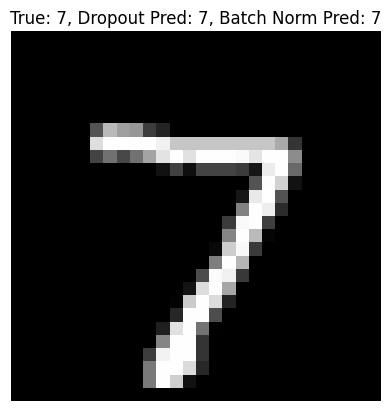

In [8]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

def train_model(use_batch_norm=False):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu' if not use_batch_norm else None),
        (BatchNormalization() if use_batch_norm else Dropout(0.2)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=5, verbose=0)
    evaluation = model.evaluate(x_test, y_test, verbose=0)

    # Predicting a single test sample
    prediction = model.predict(x_test[:1])
    predicted_label = np.argmax(prediction, axis=1)[0]

    return evaluation, predicted_label

dropout_eval, dropout_prediction = train_model(use_batch_norm=False)
batch_norm_eval, batch_norm_prediction = train_model(use_batch_norm=True)

print("Dropout Model Accuracy:", dropout_eval[1])
print("Batch Norm Model Accuracy:", batch_norm_eval[1])

# Display a single test prediction
plt.imshow(x_test[0], cmap='gray')
plt.title(f"True: {y_test[0]}, Dropout Pred: {dropout_prediction}, Batch Norm Pred: {batch_norm_prediction}")
plt.axis('off')
plt.show()
